In [3]:
import numpy as np

# Generación de datos aleatorios
np.random.seed(42) #Aleatorios se generen con la misma semilla

X = np.random.randn(200,2) # 2 dimensiones - Matriz de datos de entrada
y = (X[:,0]**2+X[:,1]**2)< 0.5 # Vector de salida (Binaria true - false)

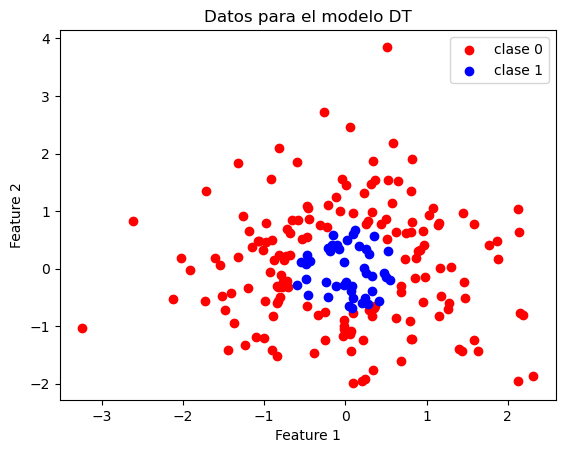

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[y==0][:,0], X[y==0][:,1], c='red', label = 'clase 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], c='blue', label = 'clase 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Datos para el modelo DT")
plt.show()

Número de muestras de entrenamiento: 140


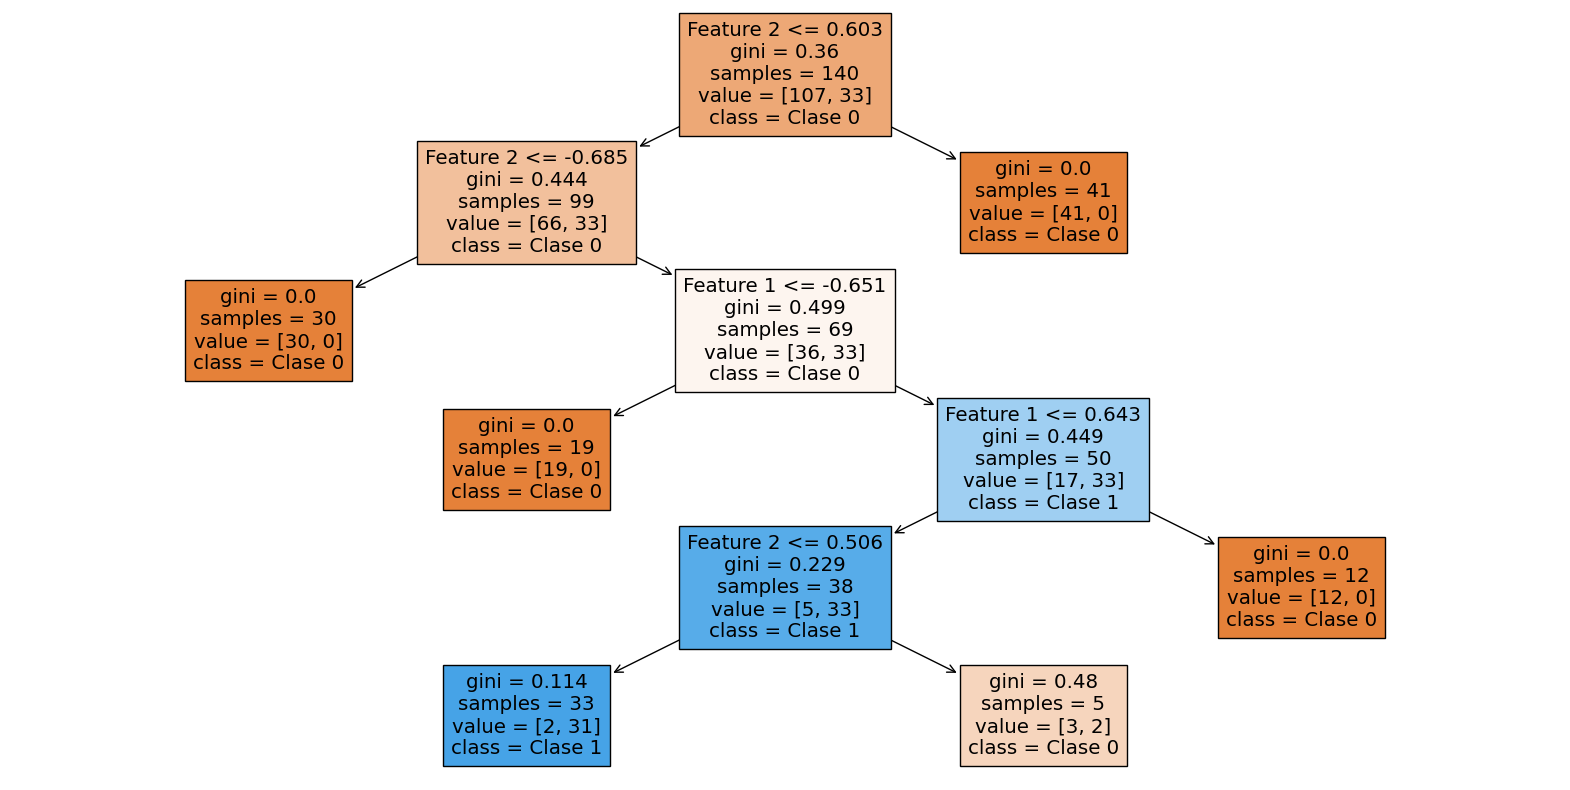

In [18]:
# Generación del modelo
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Conjunto de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo DT
arbol = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split= 20, random_state=42)
arbol.fit(X_train, y_train)

print(f'Número de muestras de entrenamiento: {len(y_train)}')
plt.figure(figsize=(20,10))
plot_tree(arbol, filled=True, 
          class_names=['Clase 0', 'Clase 1'], 
          feature_names=['Feature 1', 'Feature 2'])
plt.show()

In [19]:
# predicción
y_pred = arbol.predict(X_test)
exactitud = accuracy_score(y_pred, y_test)
print(f'La exactitud del modelo es: {exactitud:.2f}')

La exactitud del modelo es: 0.97


In [21]:
resultado = []

for max_d in [2, 3, 4, 5, None]:
    for min_samples_s in [2,5,10,20]:
        modelo = DecisionTreeClassifier(criterion='gini', 
                                        max_depth=max_d,
                                        min_samples_split=min_samples_s, 
                                        random_state=42 
                                        )
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        exactitud = accuracy_score(y_pred, y_test)
        resultado.append((max_d, min_samples_s))
        
